In [232]:
import numpy as np

In [233]:
def norm(x):
    sum = 0
    for i in range(len(x)):
        sum += x[i]**2
    # print(sum)
    return np.sqrt(sum)

#### Backtracking Line search (Inexact)

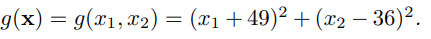

In [234]:
def g(x):
    return (x[0]+49)**2 + (x[1]-36)**2

In [235]:
def dg_dx(x):
    return np.array([2*(x[0]+49), 2*(x[1]-36)])

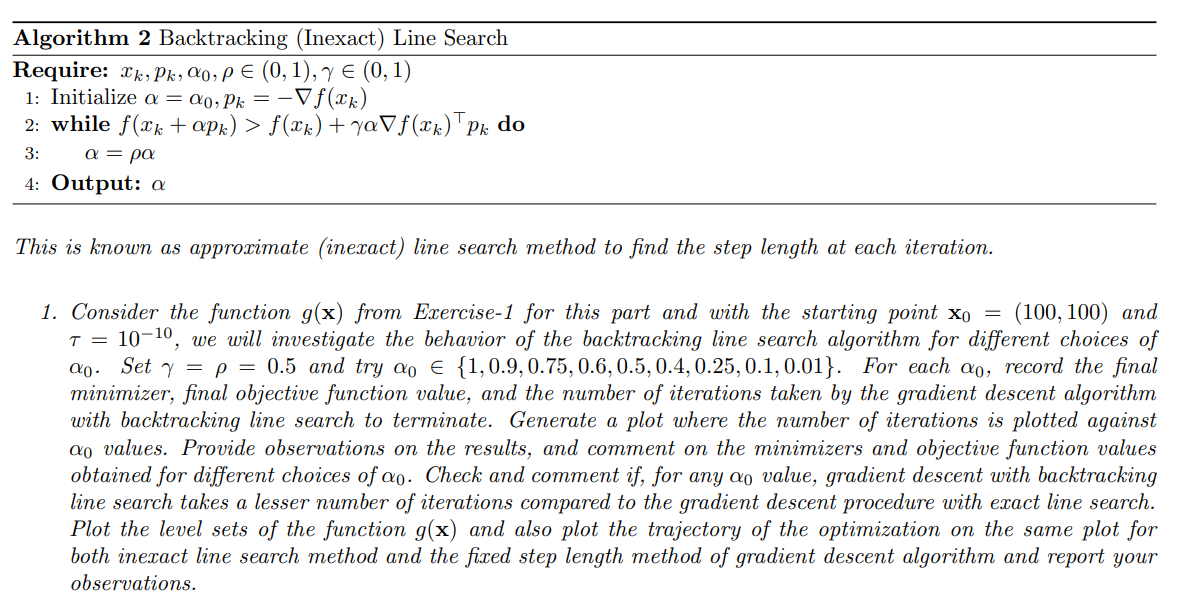

So what all we need?  
I need a function: BAcktracking1  
Args: start_x, alpha0, rho, gamma, f , df_dx  
Output: Execute the linear inexact search
Returns:  Minimizer, Function value, Iterations

In [236]:
def Backtracking_gradient_descent(start_x, f, df_dx, alpha0, rho, gamma, tau):

    iter = 0 #iterations
    x = start_x
    history = []

    while norm(df_dx(x)) > tau:

        alpha = alpha0
        p = -df_dx(x) # descent direction
        while f(x + alpha*p) > f(x) - gamma*alpha*norm(p)*norm(p):
            alpha = alpha*rho
        x = x + alpha*p
        iter += 1
        history.append([x[0],x[1]])
        

    return x,f(x),iter,history

In [237]:
print(Backtracking_gradient_descent(np.array([100,100]),f=g, df_dx=dg_dx, alpha0=1,rho=0.5,gamma=0.5,tau=0.1**10))

(array([-49.,  36.]), 1.3595230355191855e-21, 42, [[25.5, 68.0], [-11.75, 52.0], [-30.375, 44.0], [-39.6875, 40.0], [-44.34375, 38.0], [-46.671875, 37.0], [-47.8359375, 36.5], [-48.41796875, 36.25], [-48.708984375, 36.125], [-48.8544921875, 36.0625], [-48.92724609375, 36.03125], [-48.963623046875, 36.015625], [-48.9818115234375, 36.0078125], [-48.99090576171875, 36.00390625], [-48.995452880859375, 36.001953125], [-48.99772644042969, 36.0009765625], [-48.998863220214844, 36.00048828125], [-48.99943161010742, 36.000244140625], [-48.99971580505371, 36.0001220703125], [-48.999857902526855, 36.00006103515625], [-48.99992895126343, 36.000030517578125], [-48.999964475631714, 36.00001525878906], [-48.99998223781586, 36.00000762939453], [-48.99999111890793, 36.000003814697266], [-48.999995559453964, 36.00000190734863], [-48.99999777972698, 36.000000953674316], [-48.99999888986349, 36.00000047683716], [-48.999999444931746, 36.00000023841858], [-48.99999972246587, 36.00000011920929], [-48.9999998

In [238]:
alpha0_set = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
Minimizer_lst = []
Function_value_lst = []
Iterations_lst = []
history = []

for alpha0 in alpha0_set:
    minimizer,Function_value, Iterations,history = Backtracking_gradient_descent(np.array([100,100]),f=g, df_dx=dg_dx, alpha0=alpha0, rho=0.5, gamma=0.5, tau=0.1**10)
    Minimizer_lst.append(list(minimizer))
    Function_value_lst.append(Function_value)
    Iterations_lst.append(Iterations)

In [239]:
from tabulate import tabulate
table = zip(alpha0_set,Minimizer_lst, Function_value_lst, Iterations_lst)
headers = ["Alpha0 value","Minimizer", "Function_value", "Iterations"]
print(tabulate(table, headers=headers, tablefmt="grid"))

+----------------+------------------------------------------+------------------+--------------+
|   Alpha0 value | Minimizer                                |   Function_value |   Iterations |
+================+==========================================+==================+==============+
|           1    | [-48.99999999996612, 36.00000000001455]  |      1.35952e-21 |           42 |
+----------------+------------------------------------------+------------------+--------------+
|           0.9  | [-48.9999999999851, 36.0000000000064]    |      2.62998e-22 |           13 |
+----------------+------------------------------------------+------------------+--------------+
|           0.75 | [-48.99999999996612, 36.00000000001455]  |      1.35952e-21 |           21 |
+----------------+------------------------------------------+------------------+--------------+
|           0.6  | [-48.999999999972516, 36.00000000001181] |      8.94817e-22 |           32 |
+----------------+----------------------

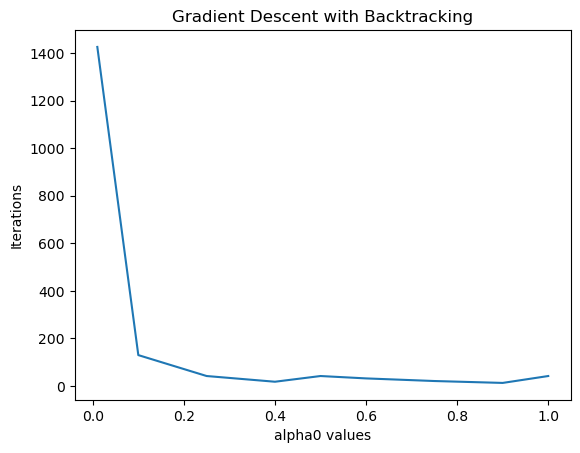

In [240]:
import matplotlib.pyplot as plt
plt.plot(alpha0_set, Iterations_lst)
plt.xlabel("alpha0 values")
plt.ylabel("Iterations")
plt.title("Gradient Descent with Backtracking")
plt.show()

#### Without the outlier of 1400 approx

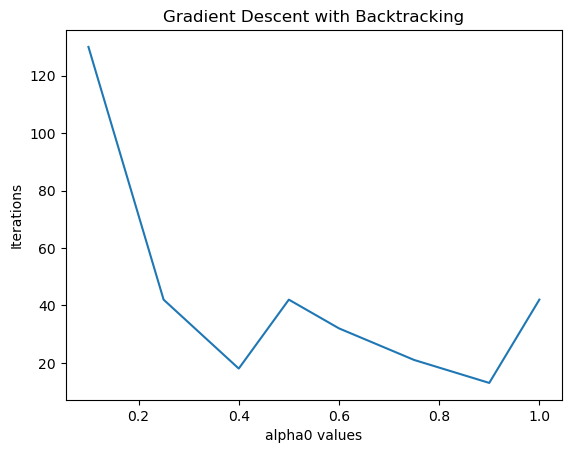

In [241]:
plt.plot(alpha0_set[-2::-1], Iterations_lst[-2::-1])
plt.xlabel("alpha0 values")
plt.ylabel("Iterations")
plt.title("Gradient Descent with Backtracking")
plt.show()

In [242]:
x_arange = np.arange(-100,100,1)
y_arange = np.arange(-100,100,1)
X,Y = np.meshgrid(x_arange,y_arange)
Z = g([X,Y])
print(history)

[[97.02, 98.72], [94.0996, 97.4656], [91.237608, 96.236288], [88.43285583999999, 95.03156224], [85.68419872319998, 93.8509309952], [82.99051474873599, 92.69391237529601], [80.35070445376127, 91.56003412779009], [77.76369036468604, 90.44883344523429], [75.22841655739232, 89.3598567763296], [72.74384822624448, 88.292659640803], [70.30897126171959, 87.24680644798694], [67.9227918364852, 86.2218703190272], [65.5843359997555, 85.21743291264666], [63.29264927976038, 84.23308425439373], [61.046796294165176, 83.26842256930586], [58.845860368281876, 82.32305411791974], [56.68894316091624, 81.39659303556134], [54.57516429769792, 80.48866117485011], [52.50366101174396, 79.5988879513531], [50.473587791509075, 78.72691019232605], [48.484116035678895, 77.87237198847953], [46.53443371496532, 77.03492454870994], [44.62374504066601, 76.21422605773574], [42.751270139852686, 75.40994153658103], [40.916244737055635, 74.62174270584941], [39.11791984231452, 73.84930785173242], [37.35556144546823, 73.0923216

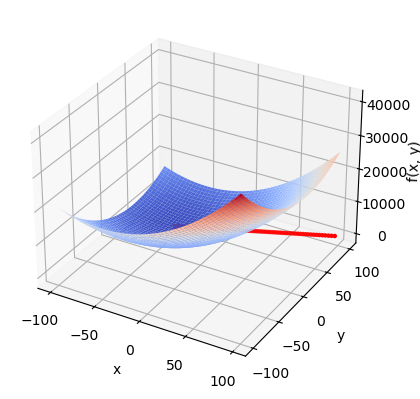

In [247]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.scatter(*zip(*history), c='r', marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

In [244]:
x_hist = [point[0] for point in history]
y_hist = [point[1] for point in history]

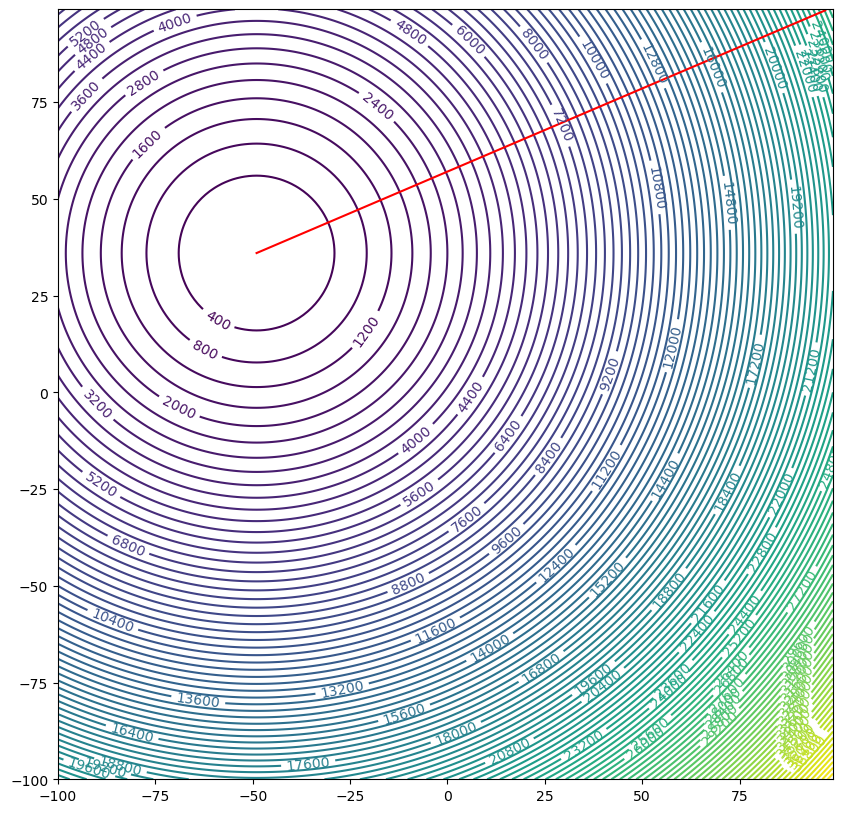

In [245]:
plt.figure(figsize=(10,10))
contour = plt.contour(X,Y,Z,levels = 100)
plt.clabel(contour, inline =True)
plt.plot(x_hist,y_hist,color = 'r')
plt.show()
